## Part 1:Train Data 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy.random as rand

In [ ]:
#다음세대 계산함수
def get_next_seq(previous_seq, rule):
    '''
    Use a rule to generate the next sequence for an automoton
    '''

    seq_length = len(previous_seq) - 2
#     rule_length = len(rule.keys()[0])
    rule_length = 3
    sub_seqs = [tuple(previous_seq[i:i + rule_length]) for i in range(0, seq_length)]
    new_seq = [rule[sub_seq] for sub_seq in sub_seqs]

    # Zero pad the ends
    new_seq.insert(0, 0)
    new_seq.append(0)
    return new_seq

In [ ]:
#rule 이진법함수
def get_wolfram_rule( rule_number ):
    '''
    Gets the mapping for the given rule.
    Each rule is essentially the binary version of the rule number
    '''
    binary_rep = str(bin(rule_number))[2:]
    # prepend 0s so that the are 8 bits
    binary_rep = [0]*(8-len(binary_rep)) + [int(b) for b in binary_rep]

    mapping = {
         (0,0,0): binary_rep[7],
         (0,0,1): binary_rep[6],
         (0,1,0): binary_rep[5],
         (0,1,1): binary_rep[4],
         (1,0,0): binary_rep[3],
         (1,0,1): binary_rep[2],
         (1,1,0): binary_rep[1],
         (1,1,1): binary_rep[0],
    }

    return mapping


In [ ]:
def make_data(rule, k): #a 의 key 에 해당하는부분의 숫자
  previous_seq = rand.randint(4,size = 400) # 0,1,2,3으로 이루어준 길이 400벡터

  idx_1 = previous_seq >= k # k=1 300개의점, k=2 200개의점, k=1 100개의점을 선택
  idx_0 = previous_seq < k


  previous_seq[idx_1] = 1
  previous_seq[idx_0] = 0
  next_seq = get_next_seq(previous_seq, get_wolfram_rule(rule)) # 다음세대 벡터

  previous_seq = np.array(previous_seq)
  next_seq = np.array(next_seq)

  previous_mat = previous_seq.reshape(20,20) #각벡터를 20x20행렬화
  next_mat = next_seq.reshape(20,20)

  X = np.array([previous_mat,next_mat]) # (2,20,20) 형태

  y = np.zeros(128) #y에 해당하는 원핫벡터
  y[round(rule/2)] = 1
  return X, y

In [ ]:
rand.seed(1)
X1, y1 = make_data(30, 2)

In [ ]:
np.shape(X1)

(2, 20, 20)

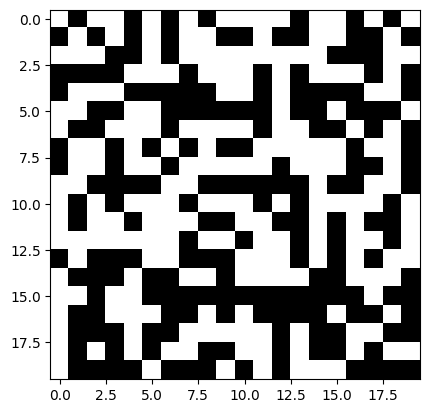

In [ ]:
plt.imshow(X1[0], cmap="binary")

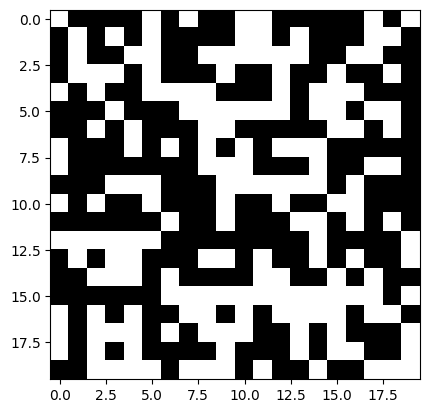

In [ ]:
plt.imshow(X1[1], cmap="binary")

In [ ]:
# X, y 데이터를 만듬
X = []
y = []
for rule in tqdm(range(128)):
  for i in range(500):
    rand.seed(500*rule+i)
    for j in range(3):
      j += 1
      X_i, y_i = make_data(2*rule,j)
      X.append(X_i)
      y.append(y_i)



100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [05:50<00:00,  2.74s/it]


In [ ]:
X = np.array(X)
y = np.array(y)
print(np.shape(X))
print(np.shape(y))

(192000, 2, 20, 20)
(192000, 128)


In [ ]:
X = np.transpose(X,(0,2,3,1)) #CNN 사용하기위해
print(np.shape(X))
print(np.shape(y))

(192000, 20, 20, 2)
(192000, 128)


In [ ]:
!pip install pickle5

import pickle5 as pickle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255318 sha256=f4bc2797c834164112ba866ebf78f789898572d855c5526a055647cab97b7438
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# 데이터 저장
with open('/content/gdrive/My Drive/CA model/data_even.pickle', 'wb') as f:
    pickle.dump((X,y), f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# 데이터 불러오기
with open('/content/gdrive/My Drive/CA model/data_even.pickle','rb') as f :
    X,y = pickle.load(f)

In [ ]:
print(np.shape(X))
print(np.shape(y))

(192000, 20, 20, 2)
(192000, 128)
